In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('produtos.T2.csv')

In [3]:
df

,PREÇO ATUAL,PREÇO ORIGINAL,NOME DO PRODUTO,MARCA,LOJA,LINK
0,"R$1.139,05","R$1.799,00",moto g 54,Motorola,Amazon,https://www.amazon.com.br/Smartphone-Moto-G54-...
1,"R$ 1.044,00","R$ 1.044,00",moto g 54,Motorola,mercado livre/miami acesssorios,https://www.mercadolivre.com.br/motorola-moto-...
2,"R$1.079,10","R$1.079,10",moto g 54,Motorola,Amazon,https://www.amazon.com.br/Smartphone-Moto-G54-...
3,"R$ 1.199,00","R$ 1.799,00",moto g 54,Motorola,Motorola,https://www.motorola.com.br/smartphone-moto-g5...
4,"R$ 1.161,45","R$ 1.290,50",moto g 54,Motorola,Magazine Luiza,https://www.magazineluiza.com.br/smartphone-mo...
...,...,...,...,...,...,...
85,"R$ 1549,00","R$ 1549,00",redmi note 12 pro,Xiaomi,Mercado livre,https://produto.mercadolivre.com.br/MLB-343254...
86,"R$ 1.799,00","R$ 1.799,00",redmi note 12 pro,Xiaomi,Mercado livre/vipa store importados,https://produto.mercadolivre.com.br/MLB-478667...
87,"R$ 3.399,99","R$ 3.399,99",redmi note 12 pro,Xiaomi,netshoes,https://www.netshoes.com.br/p/smartphone-xiaom...
88,"R$ 2.738,00","R$ 2.738,00",redmi note 12 pro,Xiaomi,bemol,https://m.bemol.com.br/smartphone-xiaomi-redmi...


In [4]:
print(df.columns)

Index(['PREÇO ATUAL', 'PREÇO ORIGINAL', 'NOME DO PRODUTO', 'MARCA', 'LOJA',
       'LINK'],
      dtype='object')


In [5]:
list(df.columns)

['PREÇO ATUAL', 'PREÇO ORIGINAL', 'NOME DO PRODUTO', 'MARCA', 'LOJA', 'LINK']

In [16]:
df['PREÇO ATUAL'] = df['PREÇO ATUAL'].str.replace('R\$ ', '', regex=True)
df['PREÇO ATUAL'] = df['PREÇO ATUAL'].str.replace('.', '', regex=False)
df['PREÇO ATUAL'] = df['PREÇO ATUAL'].str.replace(',', '.', regex=False)

In [19]:
df['PREÇO ATUAL'] = pd.to_numeric(df['PREÇO ATUAL'], errors='coerce')

media_geral = df['PREÇO ATUAL'].mean()
desvio_padrao_geral = df['PREÇO ATUAL'].std()

print(media_geral)
print(desvio_padrao_geral)

169110.31764705884
77980.28559319027


In [20]:
print("Média geral: %.2f" % media_geral)
print("Desvio padrão geral: " + str(desvio_padrao_geral))

Média geral: 169110.32
Desvio padrão geral: 77980.28559319027


In [24]:
grouped = df.groupby('MARCA')['PREÇO ATUAL']

In [25]:
grouped.agg(['mean', 'std'])

,mean,std
MARCA,,
Motorola,134857.642857,28170.915891
Xiaomi,185936.192982,88679.028610


In [32]:
result = grouped.agg(['mean', 'std'])
result.columns = ['Média','Desvio Padrão']

<Axes: xlabel='MARCA'>

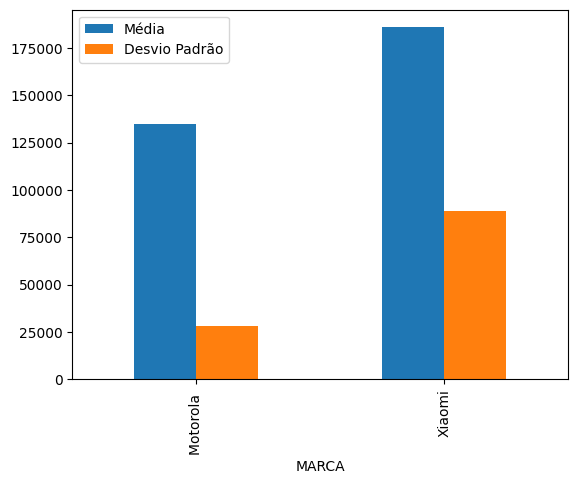

In [33]:
result.plot.bar()